#  <font color='red'>Table of Contents</font>

[1. EDA](#section1)<br>

In [1]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Libs..
import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk


# ML Libs...


# DL Libs..

CWD is  C:\Users\demitra\Downloads\mercari


C:\Users\demitra\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\demitra\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#  <a id = 'section1'> <font color='red'>  1. EDA  </font> </a>

### <font color='red'> 1.1 Load Data </font>

In [2]:
df_train = pd.read_csv('train.tsv',sep = '\t')
print(df_train.shape,'\n')
df_train.head(5)

(1482535, 8) 



,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


##### Summary - There are a total of 1.4 Million listings. Each row represents a product listing made by a seller-  the 'name' , 'item-condition', 'category', 'brand', 'ship-status', 'item-description' of the listing ,and gets back the price (to be predicted). 

### <font color='red'> 1.2 EDA - Price(target variable) </font>

In [3]:
#ref - https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

print('Missing values Count in Price = ',df_train.price.isnull().sum())
df_train.price.describe().apply(lambda x: format(x, 'f'))

Missing values Count in Price =  0


count    1482535.000000
mean          26.737516
std           38.586066
min            0.000000
25%           10.000000
50%           17.000000
75%           29.000000
max         2009.000000
Name: price, dtype: object

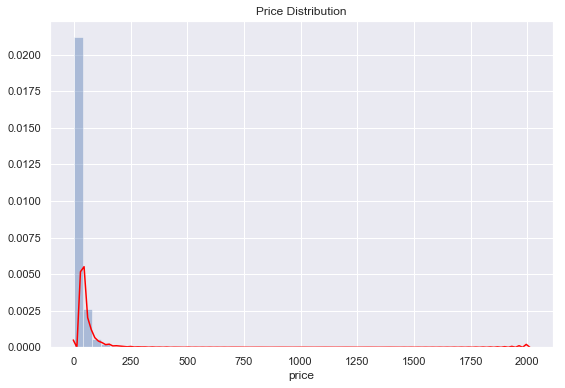

In [4]:
#ref  - https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(9,6)})
sns.distplot(df_train.price, kde_kws = {"color" : "red"})
plt.title('Price Distribution')
plt.show()

In [5]:
def generate_percentiles(data,col,start,end,step,method):
    x = PrettyTable()
    x.field_names = ["Percentile", str(col)]

    percentiles = []
    out = []
    lst = range(start,end,step) if method == 'range' else np.linspace(start,end,step)
    for i in lst:
        x.add_row([i,np.round(np.percentile(data,i), 3)])
        percentiles.append(i)
        out.append(np.round(np.percentile(data,i), 3))
    print(x)
    plt.plot(percentiles,out)
    plt.title(str(col) + ' Percentiles = ' + str(start)+"-"+str(end-1)) if method == 'range' else plt.title(str(col) + ' Percentiles = ' + str(start)+"-"+str(end))
        
    plt.show()

+------------+--------+
| Percentile | PRICE  |
+------------+--------+
|     0      |  0.0   |
|     5      |  6.0   |
|     10     |  7.0   |
|     15     |  9.0   |
|     20     |  10.0  |
|     25     |  10.0  |
|     30     |  12.0  |
|     35     |  13.0  |
|     40     |  14.0  |
|     45     |  16.0  |
|     50     |  17.0  |
|     55     |  19.0  |
|     60     |  20.0  |
|     65     |  24.0  |
|     70     |  26.0  |
|     75     |  29.0  |
|     80     |  34.0  |
|     85     |  40.0  |
|     90     |  51.0  |
|     95     |  75.0  |
|    100     | 2009.0 |
+------------+--------+


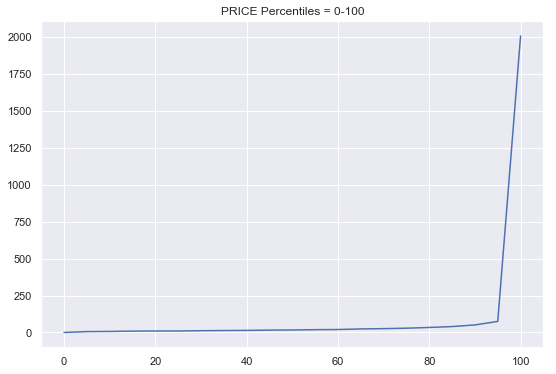

In [6]:
generate_percentiles(df_train['price'],'PRICE',0,101,5,'range')

+------------+--------+
| Percentile | PRICE  |
+------------+--------+
|     95     |  75.0  |
|     96     |  85.0  |
|     97     |  99.0  |
|     98     | 122.0  |
|     99     | 170.0  |
|    100     | 2009.0 |
+------------+--------+


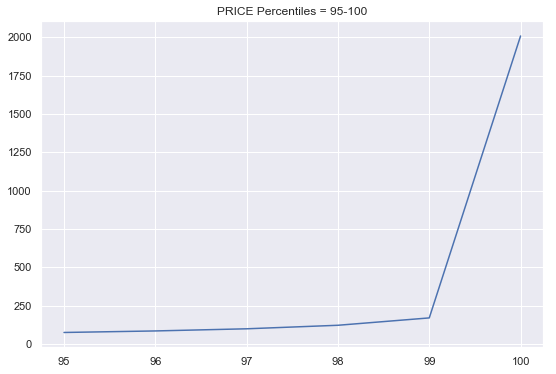

In [32]:
generate_percentiles(df_train['price'],'PRICE',95,101,1,'range')

+------------+--------+
| Percentile | PRICE  |
+------------+--------+
|    99.0    | 170.0  |
|    99.1    | 180.0  |
|    99.2    | 189.0  |
|    99.3    | 200.0  |
|    99.4    | 210.0  |
|    99.5    | 230.33 |
|    99.6    | 256.0  |
|    99.7    | 286.0  |
|    99.8    | 340.0  |
|    99.9    | 450.0  |
|   100.0    | 2009.0 |
+------------+--------+


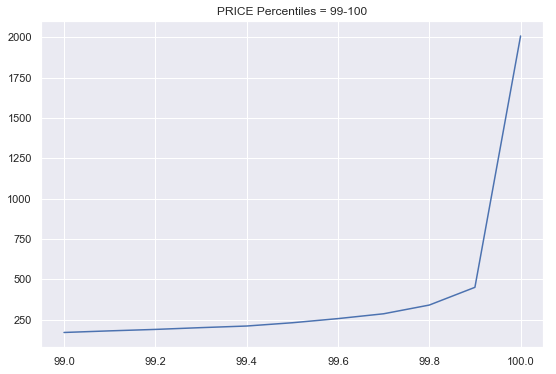

In [7]:
generate_percentiles(df_train['price'],'PRICE',99,100,11,'linspace')

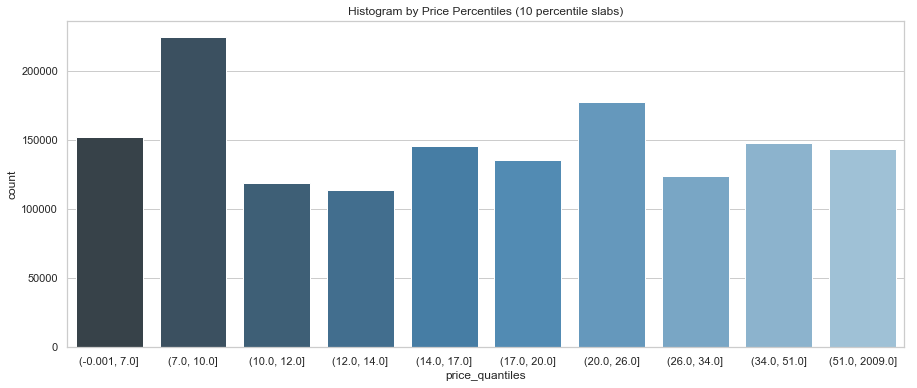

In [101]:
# ref - https://stackoverflow.com/questions/56148987/plot-a-histogram-based-on-percentiles

df_train['Quantile'] = pd.qcut(df_train.price, q=np.arange(0,1.1,0.1))
tmp_df = pd.DataFrame(df_train.groupby('price_quantiles').agg('size').reset_index())
tmp_df.columns = ['price_quantiles','count']

sns.set(rc={'figure.figsize':(15,6)}, style = 'whitegrid')
sns.barplot(x="price_quantiles", y="count", data= tmp_df,palette="Blues_d")
plt.title('Histogram by Price Percentiles (10 percentile slabs)')
plt.show()

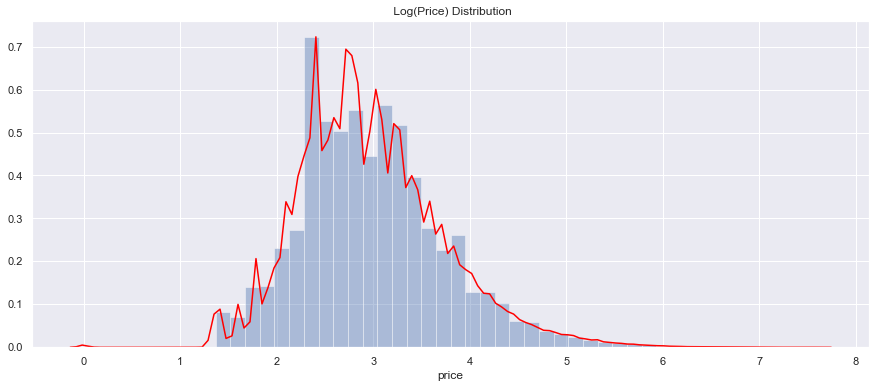

In [76]:
df_train['log_price'] = np.log1p(df_train['price'])
sns.set(rc={'figure.figsize':(15,6)})
sns.distplot(np.log1p(df_train.price), kde_kws = {"color" : "red"})
plt.title(' Log(Price) Distribution')
plt.show()

### <font color='red'> 1.3 EDA - Price variations in Shipping </font>

In [74]:
print('Check missing values in Shipping Column = ',df_train.shipping.isnull().sum())
df_train.groupby('shipping')['price'].describe()

Check missing values in Shipping Column =  0


,count,mean,std,min,25%,50%,75%,max
shipping,,,,,,,,
0,819435.0,30.111778,39.53592,0.0,13.0,20.0,33.0,2009.0
1,663100.0,22.567726,36.95579,0.0,8.0,14.0,25.0,2000.0


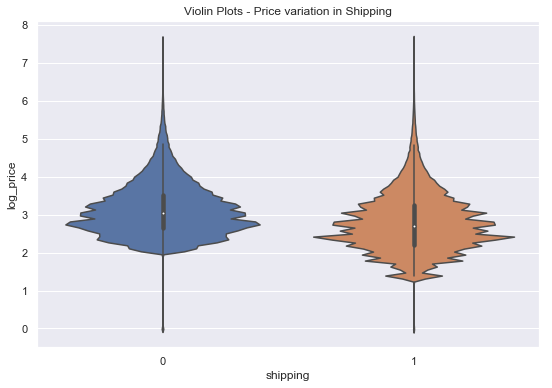

In [78]:
#ref - https://seaborn.pydata.org/generated/seaborn.violinplot.html

sns.set(rc={'figure.figsize':(9,6)})
sns.violinplot(x="shipping", y="log_price", data = df_train)
plt.title('Violin Plots - Price variation in Shipping')
plt.show()

##### Summary - We can see, that values for (shipping = 1) are lower than shipping = 0. shipping = 1 indicates that the price was paid by the seller. But is the difference statistically significant ? Let us do a significance test to find that out..

In [79]:
#ref - https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

from scipy.stats import f_oneway

stat, p = f_oneway(df_train.price.values[df_train.shipping == 1], df_train.price.values[df_train.shipping == 0])
print('Statistics=%.9f, p=%.9f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=14143.607688957, p=0.000000000
Different distributions (reject H0)


##### Summary - Clearly, ANOVA test suggests that there is a significant difference and 'p' value is quite negligible - so we will be going forward with our conclusion that there is indeed a significant enough difference between the 2 shipping categories in the price values

### <font color='red'> 1.4 EDA - Price variations in Item Condition </font>

In [80]:
print('Check missing values in Item Condition Column = ',df_train.item_condition_id.isnull().sum())
df_train.groupby('item_condition_id')['price'].describe()

Check missing values in Item Condition Column =  0


,count,mean,std,min,25%,50%,75%,max
item_condition_id,,,,,,,,
1,640549.0,26.486967,35.418024,0.0,10.0,18.0,30.00,2009.0
2,375479.0,27.563225,42.125698,0.0,11.0,17.0,29.00,2004.0
3,432161.0,26.540711,40.030681,0.0,11.0,16.0,28.00,2000.0
4,31962.0,24.349212,35.679148,0.0,10.0,15.0,26.00,1309.0
5,2384.0,31.703859,39.531069,0.0,11.0,19.0,35.25,522.0


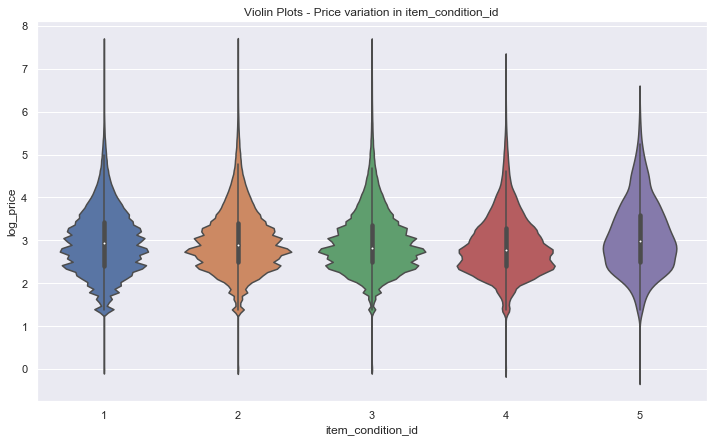

In [81]:
#ref - https://seaborn.pydata.org/generated/seaborn.violinplot.html

sns.set(rc={'figure.figsize':(12,7)})
sns.violinplot(x="item_condition_id", y="log_price", data = df_train)
plt.title('Violin Plots - Price variation in item_condition_id')
plt.show()

In [82]:
#ref - https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

from scipy.stats import f_oneway

stat, p = f_oneway(df_train.price.values[df_train.item_condition_id == 1],
                   df_train.price.values[df_train.item_condition_id == 2],
                   df_train.price.values[df_train.item_condition_id == 3],
                   df_train.price.values[df_train.item_condition_id == 4],
                   df_train.price.values[df_train.item_condition_id == 5])
print('Statistics=%.9f, p=%.9f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=93.055869753, p=0.000000000
Different distributions (reject H0)


### <font color='red'> 1.5 EDA - Price variations in Brands </font>

In [84]:
print('Check missing values in Brand Column = ',df_train.brand_name.isnull().sum(), " which is ",
     round(df_train.brand_name.isnull().sum()/len(df_train),4)*100," %",'\n')
print('Unique Number of Brands are = ',df_train.brand_name.nunique())

Check missing values in Brand Column =  632682  which is  42.68  % 

Unique Number of Brands are =  4809


In [85]:
# df_brands = df_train[df_train.brand_name.notnull()].groupby('brand_name')['price'].
#ref - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html
# ref - https://stackoverflow.com/questions/20965046/cumulative-sum-and-percentage-on-column
#ref - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html

df_brands = pd.DataFrame(df_train.groupby('brand_name', as_index=False).agg({'price': 'mean','shipping' : 'count'}))
df_brands.columns = ['brand_name','avg_price','count']
df_brands = df_brands.sort_values(by=['count'],ascending = False)
df_brands['cumsum_count'] = df_brands['count'].cumsum()
df_brands['cumsum_perc'] = round(100*(df_brands['cumsum_count']/df_brands['count'].sum()),2)
df_brands = df_brands.reset_index()

print('df_brands.shape  = ' , df_brands.shape)
df_brands.head(12)

df_brands.shape  =  (4809, 6)


,index,brand_name,avg_price,count,cumsum_count,cumsum_perc
0,3221,PINK,26.341314,54088,54088,6.36
1,3057,Nike,30.760265,54043,108131,12.72
2,4504,Victoria's Secret,23.214287,48036,156167,18.38
3,2604,LuLaRoe,33.667967,31024,187191,22.03
4,267,Apple,73.268618,17322,204513,24.06
5,1510,FOREVER 21,12.929935,15186,219699,25.85
6,3067,Nintendo,34.672619,15007,234706,27.62
7,2626,Lululemon,47.096717,14558,249264,29.33
8,2841,Michael Kors,62.254775,13928,263192,30.97
9,213,American Eagle,15.960955,13254,276446,32.53


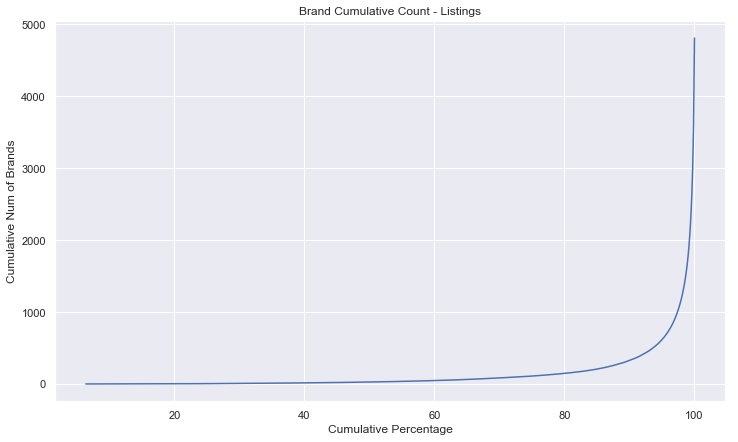

In [86]:
plt.plot(df_brands.cumsum_perc,df_brands.index)
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Num of Brands')
plt.title('Brand Cumulative Count - Listings')
plt.show()

##### Summary - 97% of Product Listings are covered by top 1000 Brands (by Count of Listings)

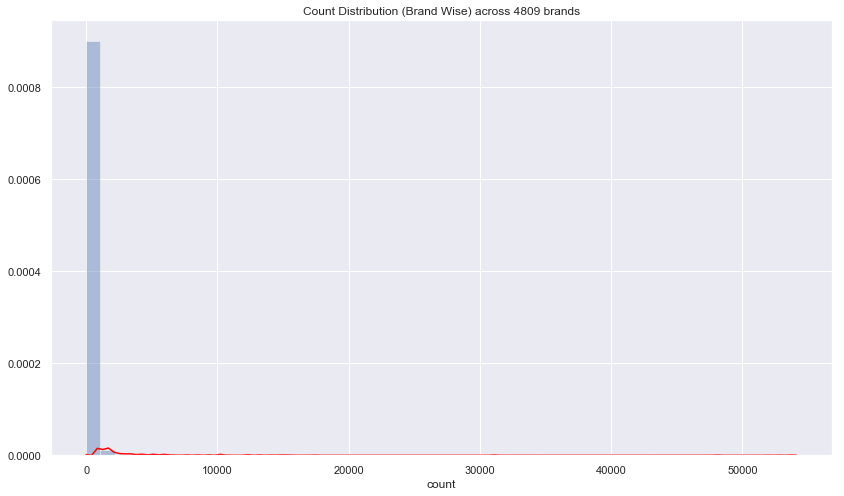

In [87]:
sns.set(rc={'figure.figsize':(14,8)})
sns.distplot(df_brands['count'].astype(int), kde_kws = {"color" : "red"})
plt.title('Count Distribution (Brand Wise) across '+ str(len(df_brands))+' brands')
plt.show()

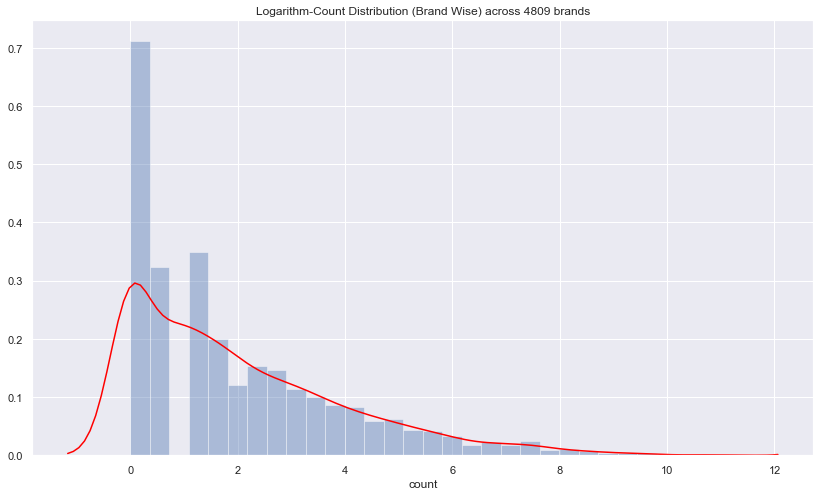

In [88]:
sns.set(rc={'figure.figsize':(14,8)})
sns.distplot(np.log(df_brands['count'].astype(int)), kde_kws = {"color" : "red"})
plt.title('Logarithm-Count Distribution (Brand Wise) across '+ str(len(df_brands))+' brands')
plt.show()

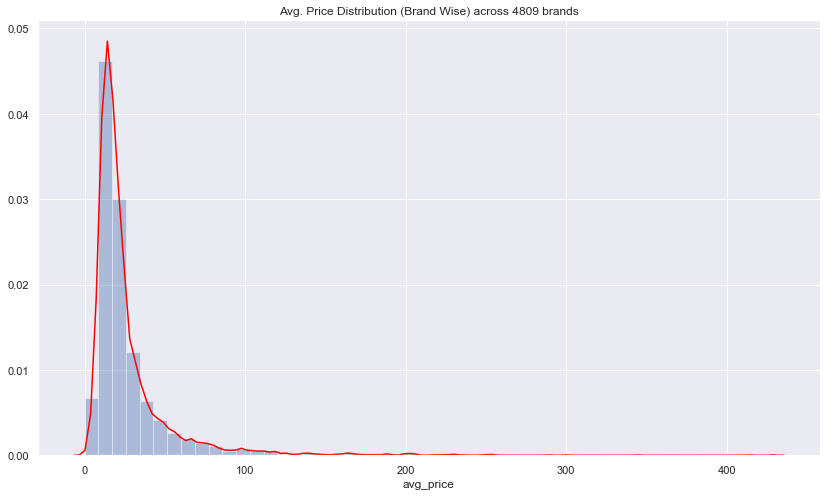

In [89]:
sns.set(rc={'figure.figsize':(14,8)})
sns.distplot(df_brands.avg_price, kde_kws = {"color" : "red"})
plt.title('Avg. Price Distribution (Brand Wise) across '+ str(len(df_brands))+' brands')
plt.show()

##### Summary - Most Brands have Avg Price Ranges in the Range of about = (20-30)

### <font color='red'> 1.6 EDA - Price variations across Categories </font>

In [90]:
print('Check missing values in Category Column = ',df_train.category_name.isnull().sum(), " which is ",
     round(df_train.category_name.isnull().sum()/len(df_train),4)*100," %")

Check missing values in Category Column =  6327  which is  0.43  %


In [93]:
df_train.category_name.values

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ...,
       'Sports & Outdoors/Exercise/Fitness accessories',
       'Home/Home Décor/Home Décor Accents',
       "Women/Women's Accessories/Wallets"], dtype=object)

##### Summary - As we can see, Category generally occurs in 3 Levels - seperated by the '/' delimiter . This typically represents a Product category Hierarchy in the Product Listing Catelogue. In certain listings , there are even 5 Levels

In [94]:
#check = df_train
#ref - https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns

df_train[['cat1','cat2','cat3','cat4','cat5']] = df_train['category_name'].str.split('/', 0, expand=True)
df_train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Quantile,price_quantiles,log_price,cat1,cat2,cat3,cat4,cat5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,"(7.0, 10.0]","(7.0, 10.0]",2.397895,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,"(51.0, 2009.0]","(51.0, 2009.0]",3.970292,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,"(7.0, 10.0]","(7.0, 10.0]",2.397895,Women,Tops & Blouses,Blouse,None,None


In [96]:
print('Check missing values in cat1 Column = ',df_train.cat1.isnull().sum(), " which is ",
     round(df_train.cat1.isnull().sum()/len(df_train),4)*100," %",'\n')
print('Unique number of Elements in cat1 are = ',df_train.cat1.nunique())
print('Elements in cat1 are = ',df_train.cat1.unique())

Check missing values in cat1 Column =  6327  which is  0.43  % 

Unique number of Elements in cat1 are =  10
Elements in cat1 are =  ['Men' 'Electronics' 'Women' 'Home' 'Sports & Outdoors'
 'Vintage & Collectibles' 'Beauty' 'Other' 'Kids' nan 'Handmade']


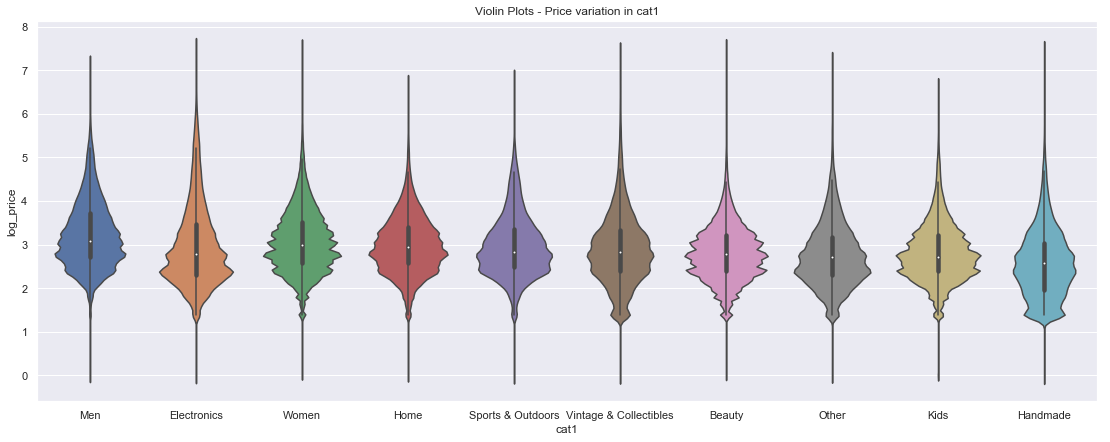

In [97]:
#ref - https://seaborn.pydata.org/generated/seaborn.violinplot.html

sns.set(rc={'figure.figsize':(19,7)})
sns.violinplot(x="cat1", y="log_price", data = df_train)
plt.title('Violin Plots - Price variation in cat1')
plt.show()

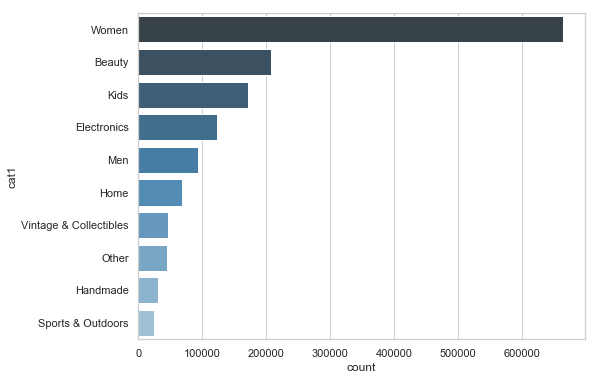

In [98]:
df_cat1_counts = pd.DataFrame(df_train.groupby('cat1',as_index = False).agg({'shipping' : 'count'}))
df_cat1_counts.columns = ['cat1','count']
df_cat1_counts = df_cat1_counts.sort_values(by=['count'],ascending = False)

sns.set(rc={'figure.figsize':(8,6)}, style = 'whitegrid')
sns.barplot(x = "count", y="cat1", data=df_cat1_counts,palette="Blues_d")

In [103]:
text_cat3 = " ".join(cat for cat in df_train.cat3.values.astype(str))
text_cat2 = " ".join(cat for cat in df_train.cat2.values.astype(str))
text_cat1 = " ".join(cat for cat in df_train.cat1.values.astype(str))

text_cat = text_cat1 + text_cat2 + text_cat3
print ("There are {} words in the combination of all review.".format(len(text_cat)),'\n')

There are 45937417 words in the combination of all review. 



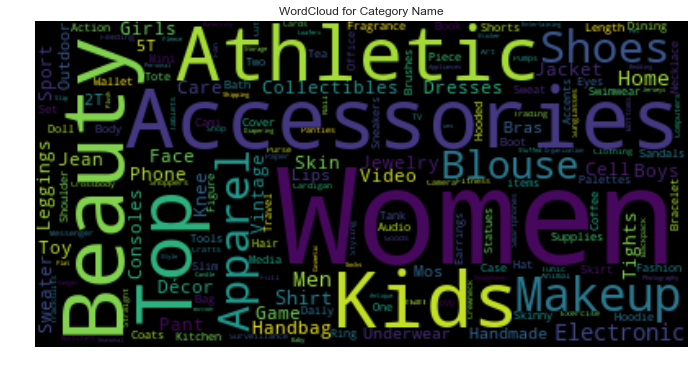

In [104]:
# Create and generate a word cloud image:
#ref - https://www.datacamp.com/community/tutorials/wordcloud-python
#ref - https://stackoverflow.com/questions/43954114/python-wordcloud-repetitve-words
#ref - https://www.geeksforgeeks.org/generating-word-cloud-python/

wordcloud = WordCloud(collocations=False).generate(text_cat)

plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Category Name')
plt.show()

### <font color='red'> 1.7 EDA - Visualize 'Item Names' </font>

In [8]:
print('Missing values in listing "name" are ', df_train.name.isnull().sum())

Missing values in listing "name" are  0


In [9]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def text_preprocess(data):
    preprocessed = []
    # tqdm is for printing the status bar
    for sentance in tqdm_notebook(data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [10]:
df_train['name_preprocessed'] = text_preprocess(df_train['name'])

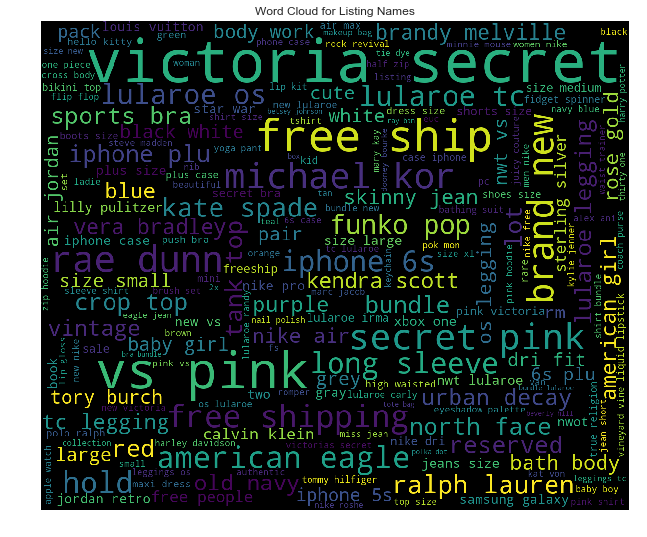

In [114]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(df_train.name_preprocessed.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Listing Names')
plt.show()

In [11]:
# ref - https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

a = df_train['name_preprocessed'].str.lower().str.cat(sep = ' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

df_names_freq_dist = pd.DataFrame(word_dist.most_common(),columns=['Word', 'Frequency'])
df_names_freq_dist = df_names_freq_dist.sort_values(by=['Frequency'],ascending = False)
df_names_freq_dist['cumsum_Frequency'] = df_names_freq_dist['Frequency'].cumsum()
df_names_freq_dist['cumsum_perc'] = round(100*(df_names_freq_dist['cumsum_Frequency']/df_names_freq_dist['Frequency'].sum()),2)
df_names_freq_dist = df_names_freq_dist.reset_index()
print(df_names_freq_dist.shape, ' df_names_freq_dist.shape ')
df_names_freq_dist.head(10)

(104883, 5)  df_names_freq_dist.shape 


,index,Word,Frequency,cumsum_Frequency,cumsum_perc
0,0,pink,83951,83951,1.31
1,1,bundle,77836,161787,2.52
2,2,new,76892,238679,3.72
3,3,size,73413,312092,4.87
4,4,lularoe,63445,375537,5.86
5,5,black,56399,431936,6.74
6,6,nike,46471,478407,7.46
7,7,vs,44384,522791,8.16
8,8,2,41317,564108,8.80
9,9,secret,40533,604641,9.43


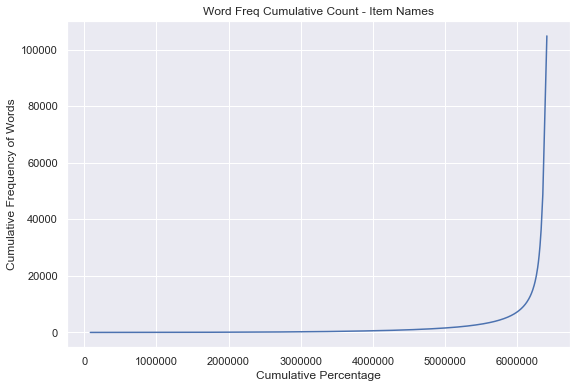

In [12]:
plt.plot(df_names_freq_dist.cumsum_Frequency,df_names_freq_dist.index)
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Frequency of Words')
plt.title('Word Freq Cumulative Count - Item Names')
plt.show()

In [13]:
#ref  - https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

t = 95
df_sub = df_names_freq_dist[df_names_freq_dist['cumsum_perc'] < t]
print(len(df_sub)," words out of", len(df_names_freq_dist)," words", 
    " have Cumulative frequency < ",str(t)," and min word freq is ",min(df_sub.Frequency))

9310  words out of 104883  words  have Cumulative frequency <  95  and min word freq is  35


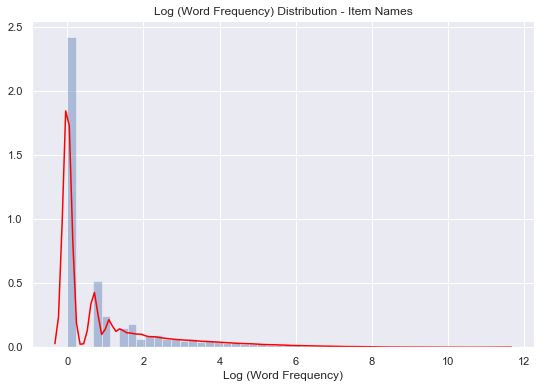

In [15]:
sns.distplot(np.log(df_names_freq_dist['Frequency']),kde = True, hist = True,kde_kws={"color": "red"})
plt.xlabel('Log (Word Frequency)')
plt.title('Log (Word Frequency) Distribution - Item Names')
plt.show()

In [16]:
df_names_freq_dist['Frequency'].describe()

count    104883.000000
mean         61.113755
std         888.543930
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       83951.000000
Name: Frequency, dtype: float64

### <font color='red'> 1.8 EDA - Visualize 'Item Descriptions' </font>

In [121]:
print('Missing values in listing "Description" are ', df_train.item_description.isnull().sum())

Missing values in listing "Description" are  0


In [17]:
df_train['item_description'] = df_train['item_description'].replace([np.nan,'No description yet'], '')
print('Missing values in listing "Description" are ', df_train.item_description.isnull().sum())

Missing values in listing "Description" are  0


In [18]:
df_train['desc_preprocessed'] = text_preprocess(df_train['item_description'])

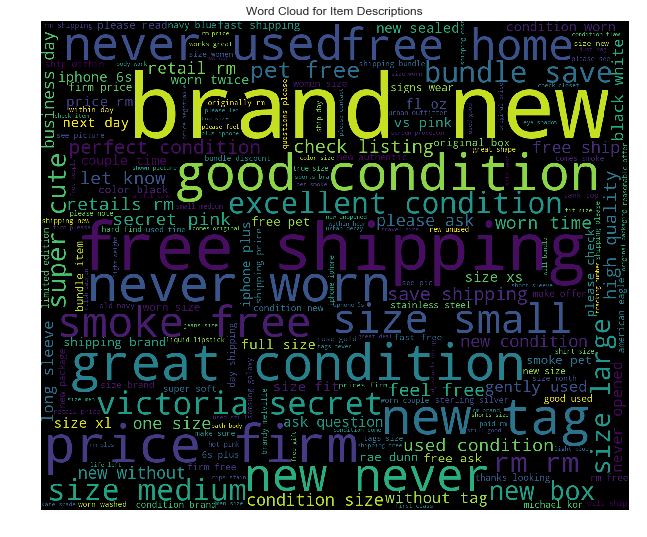

In [124]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(df_train.desc_preprocessed.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Item Descriptions')
plt.show()

In [20]:
a = df_train['desc_preprocessed'].str.lower().str.cat(sep = ' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

df_names_freq_dist = pd.DataFrame(word_dist.most_common(),columns=['Word', 'Frequency'])
df_names_freq_dist = df_names_freq_dist.sort_values(by=['Frequency'],ascending = False)
df_names_freq_dist['cumsum_Frequency'] = df_names_freq_dist['Frequency'].cumsum()
df_names_freq_dist['cumsum_perc'] = round(100*(df_names_freq_dist['cumsum_Frequency']/df_names_freq_dist['Frequency'].sum()),2)
df_names_freq_dist = df_names_freq_dist.reset_index()
print(df_names_freq_dist.shape, ' df_names_freq_dist.shape ')
df_names_freq_dist.head(10)

(160464, 5)  df_names_freq_dist.shape 


,index,Word,Frequency,cumsum_Frequency,cumsum_perc
0,0,new,499710,499710,1.73
1,1,size,456232,955942,3.31
2,2,i,327977,1283919,4.44
3,3,brand,274497,1558416,5.39
4,4,free,271228,1829644,6.33
5,5,condition,256095,2085739,7.21
6,6,no,244353,2330092,8.06
7,7,not,240553,2570645,8.89
8,8,shipping,227054,2797699,9.67
9,9,rm,225063,3022762,10.45


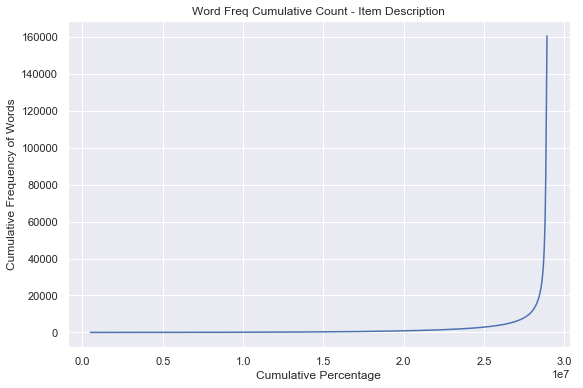

In [22]:
plt.plot(df_names_freq_dist.cumsum_Frequency,df_names_freq_dist.index)
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Frequency of Words')
plt.title('Word Freq Cumulative Count - Item Description')
plt.show()

In [23]:
#ref  - https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

t = 98
df_sub = df_names_freq_dist[df_names_freq_dist['cumsum_perc'] < t]
print(len(df_sub)," words out of", len(df_names_freq_dist)," words", 
    " have Cumulative frequency < ",str(t)," and min word freq is ",min(df_sub.Frequency))

16955  words out of 160464  words  have Cumulative frequency <  98  and min word freq is  42


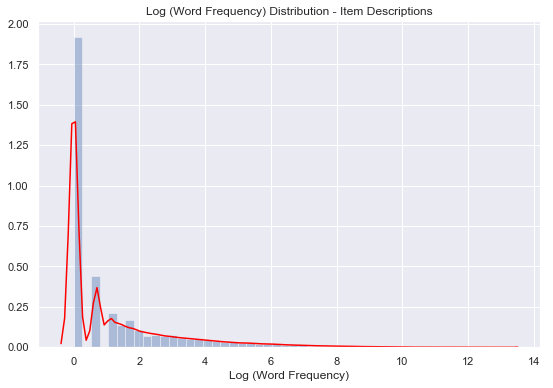

In [24]:
sns.distplot(np.log(df_names_freq_dist['Frequency']),kde = True, hist = True,kde_kws={"color": "red"})
plt.xlabel('Log (Word Frequency)')
plt.title('Log (Word Frequency) Distribution - Item Descriptions')
plt.show()

In [25]:
df_names_freq_dist['Frequency'].describe()

count    160464.000000
mean        180.244316
std        3405.900289
min           1.000000
25%           1.000000
50%           1.000000
75%           6.000000
max      499710.000000
Name: Frequency, dtype: float64

### <font color='red'> 1.9 EDA - Topic Modelling (LDA) on 'Item Descriptions' </font>

In [132]:
def lemmatize_stemming(text):
    stemmer  = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def tokenize(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [134]:
#ref - https://stackoverflow.com/questions/52153037/how-to-use-tqdm-with-map-for-dataframes

tqdm.pandas()
df_train['desc_tokenize'] = df_train['desc_preprocessed'].progress_map(tokenize)
#df_train['desc_processed'] = df_train['desc_processed'].progress_map(lemmatize_stemming)

100%|██████████| 1482535/1482535 [11:59<00:00, 2061.41it/s]


In [136]:
nltk.download('wordnet')
dictionary = gensim.corpora.Dictionary(df_train['desc_tokenize'].values)
dictionary.filter_extremes(no_below = 50, no_above=0.8, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in df_train['desc_tokenize'].values]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\demitra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [137]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic),'\n')

Topic: 0 Word: 0.016*"necklac" + 0.016*"bracelet" + 0.012*"charm" + 0.011*"silver" + 0.010*"gold" + 0.010*"chain" + 0.008*"inch" + 0.008*"choker" + 0.007*"gift" + 0.007*"disney" 

Topic: 1 Word: 0.022*"oz" + 0.015*"shade" + 0.013*"new" + 0.011*"lip" + 0.011*"swatch" + 0.011*"palett" + 0.011*"brush" + 0.011*"brand" + 0.011*"color" + 0.010*"fl" 

Topic: 2 Word: 0.025*"rae" + 0.025*"dunn" + 0.017*"mug" + 0.014*"polo" + 0.013*"care" + 0.012*"lauren" + 0.012*"ralph" + 0.011*"sheet" + 0.011*"set" + 0.010*"wrap" 

Topic: 3 Word: 0.047*"size" + 0.023*"medium" + 0.022*"small" + 0.020*"larg" + 0.020*"fit" + 0.019*"shirt" + 0.016*"nike" + 0.015*"men" + 0.015*"women" + 0.015*"wear" 

Topic: 4 Word: 0.018*"dress" + 0.017*"jean" + 0.016*"size" + 0.013*"waist" + 0.011*"wear" + 0.010*"fit" + 0.009*"length" + 0.008*"short" + 0.008*"cute" + 0.007*"super" 

Topic: 5 Word: 0.015*"book" + 0.013*"pop" + 0.011*"mint" + 0.009*"sticker" + 0.008*"dvd" + 0.008*"funko" + 0.008*"exclus" + 0.008*"figur" + 0.008*"ho